#                               **Análisis de Calidad de Vinos con MLP**
## puede descargarlo de: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

## **Realizado por:** José Max Barrios

### Asignación principal: Conseguir Clasificar la calidad de Vinos construyendo una MLP, con ayuda de Keras.

In [2448]:
#Accesing to my Google Drive Account to take the Dataset
# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
#Importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
plt.style.use('ggplot')

In [0]:
# wine dataset
RTT_File= "/gdrive/My Drive/Banistmo/winequality.csv"

In [2451]:
#Creando dataframe para vino blanco y vino eojo
wine = pd.read_csv(RTT_File, sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2452]:
#Verificando clase de datos
wine.info()
#No hay valores NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [2453]:
#Verificando información de los datos
wine.describe()
#Tenemso valores con escalas muy desiguales, por lo que tendremos que normalizar los datos más adelante

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [2454]:
#Verificando calidad de vino
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

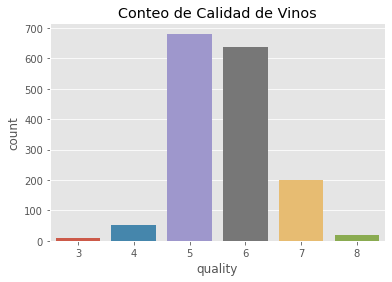

In [2455]:
plot_wine = sns.countplot(data=wine, x='quality')
plt.title('Conteo de Calidad de Vinos')
plt.show()

## **Buscando Correlación más fuerte de variables**

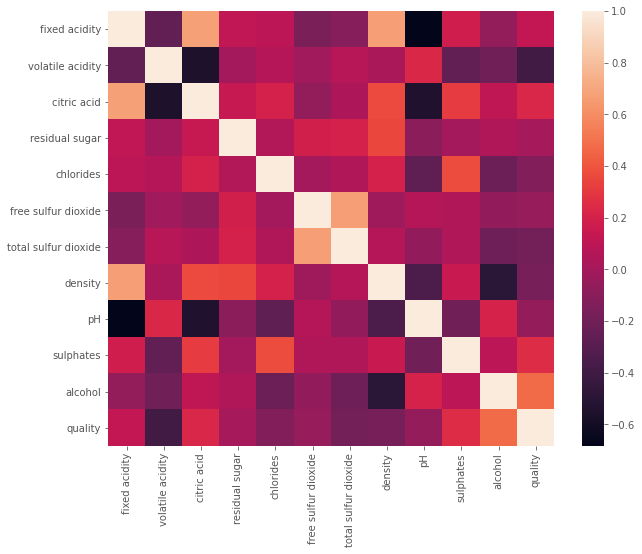

In [2456]:
#Mapa de Calor para ver Graficamente las variables que más explican el modelo
fig_Dims = (10,8)
fig, ax = plt.subplots(figsize=fig_Dims)
sns.heatmap(wine.corr(),ax=ax)
plt.show()

In [2457]:
#Observandolo correlación terminos numericos
abs(wine.corr()['quality'])

fixed acidity           0.124052
volatile acidity        0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides               0.128907
free sulfur dioxide     0.050656
total sulfur dioxide    0.185100
density                 0.174919
pH                      0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64



Siguiendo lo realizado en el análisis con el enfoque de Machine Learning, realizaremos el PCA 


Clasificaremos los vinos de la siguiente manera:

Calidad menor o igual a 3 = **Calidad Baja**

Calidad Mayor de 3 y menor o igual a 7 = **Calidad Standard**

Calidad Mayor de 7 = **Alta calidad**

In [0]:
#Creando funcion para calida de vino 1= calidad baja, 2=calidad Standard, 3=alta calidad
def calidad(vino):
  if vino >= 1 and vino <= 3:
        return 1
  elif vino >= 4 and vino <= 7:
        return 2
  elif vino >= 8 and vino <= 10:
        return 3

In [2459]:
#Aplicando la función calidad para crear nueva columna
wine['Calidades'] = wine['quality'].apply(calidad)
wine['Calidades'].value_counts()

2    1571
3      18
1      10
Name: Calidades, dtype: int64

## **Deep Learning Approach**

In [0]:
#Importando Keras
import tensorflow as tf
from tensorflow import keras

In [0]:
#Separando el Target de las demas variables
#Creando un dataset eliminando la columna target.
#Separando Valors de Target
X= wine.iloc[:,:11]
#Target Varialbe
y = wine['Calidades']

## **Normalización de Datos**

In [0]:
#Normalizando Valores para datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
#Creando el one hot encoding para normalizar las salidas
from sklearn.preprocessing import OneHotEncoder
y= pd.DataFrame(y)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

## **PCA**

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca_x = pca.fit_transform(X)

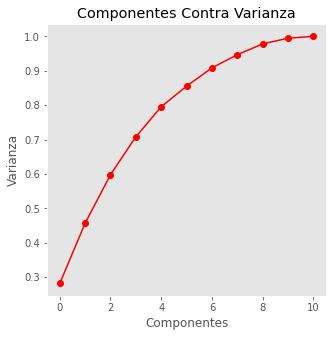

In [2465]:
#Buscando Elegir cuantos Componentes con respecto a la varianzza
plt.figure(figsize=(5,5))
plt.xlabel('Componentes')
plt.ylabel('Varianza')
plt.title('Componentes Contra Varianza')
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [0]:
#Eligiriremos 8 componentes principañes, ya que representan aproximadamente un 90% de la variación en nuestros datos
pca_componentes = PCA(n_components=8)
x_pca = pca_componentes.fit_transform(X)

## **Data Partition**

In [0]:
#Train 75% test 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## **Red Neuronal**


In [2468]:
#Importando Keras para ANN
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
# 3 Hidden Layers 
model = Sequential()
model.add(Dense(1, input_dim=11, activation='tanh'))
# Layer de Clasifiación
model.add(Dense(3, activation='softmax'))
#Optimizador, Learning Rate
opt = keras.optimizers.SGD(lr=0.1, nesterov= True, momentum=0.9, decay=1e-6)
model.summary()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 1)                 12        
_________________________________________________________________
dense_181 (Dense)            (None, 3)                 6         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compilando modelo
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [2470]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=20, batch_size=8)

Train on 1199 samples, validate on 400 samples
Epoch 1/20
1199/1199 [==============================] - 0s 210us/step - loss: 0.1380 - accuracy: 0.9741 - val_loss: 0.0654 - val_accuracy: 0.9900
Epoch 2/20
1199/1199 [==============================] - 0s 138us/step - loss: 0.1045 - accuracy: 0.9800 - val_loss: 0.0608 - val_accuracy: 0.9900
Epoch 3/20
1199/1199 [==============================] - 0s 144us/step - loss: 0.0993 - accuracy: 0.9800 - val_loss: 0.0685 - val_accuracy: 0.9900
Epoch 4/20
1199/1199 [==============================] - 0s 136us/step - loss: 0.0928 - accuracy: 0.9800 - val_loss: 0.0680 - val_accuracy: 0.9900
Epoch 5/20
1199/1199 [==============================] - 0s 156us/step - loss: 0.0916 - accuracy: 0.9800 - val_loss: 0.0727 - val_accuracy: 0.9900
Epoch 6/20
1199/1199 [==============================] - 0s 143us/step - loss: 0.0943 - accuracy: 0.9800 - val_loss: 0.0596 - val_accuracy: 0.9900
Epoch 7/20
1199/1199 [==============================] - 0s 140us/step - loss:

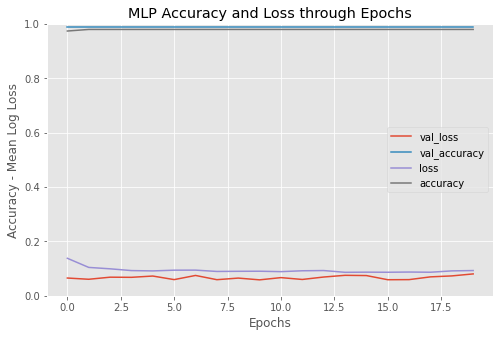

In [2480]:
#Graficando los resultados
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.title('MLP Accuracy and Loss through Epochs')
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### **Resultados de la red neuronal**

Podemos observar en nuestro grafico que a medida que pasan los epochs nuestras preciciones van aumentando, y nuestra perdida disminuyendo. Quizas si entrenamos más tiempo pudiesemos mejorar un poco nuestra efectividad, pero debido a que la efectividad es bastante buena, he decidido dejarla con esta cantidad de epochs, para no caer en overfiiting

In [2481]:
#Resumen de los parametros
history.params

{'batch_size': 8,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 1199,
 'steps': None,
 'verbose': 1}

## **Accuracy**

In [2482]:
results[-1:]

,val_loss,val_accuracy,loss,accuracy
19,0.080538,0.99,0.092919,0.979983


## **Confusion Matrix**

In [0]:
rounded_predictions = model.predict_classes(X_test, batch_size=220, verbose=0)


In [0]:
#Conviertiendo el one hot encoded a digitos simples
rounded_labels=np.argmax(y_test, axis=1)


In [2485]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[  0,   3,   0],
       [  0, 396,   0],
       [  0,   1,   0]])

In [2486]:
from sklearn.metrics import classification_report
#Let's see how our model performed
print(classification_report(rounded_predictions,rounded_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      0.99       400
           2       0.00      0.00      0.00         0

    accuracy                           0.99       400
   macro avg       0.33      0.33      0.33       400
weighted avg       1.00      0.99      0.99       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f};'.format(accuracy, misclass))
    plt.show()

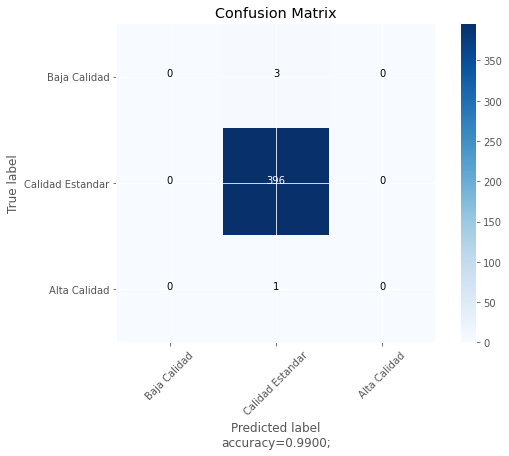

In [2489]:
#Graficando Matriz de Confusión
plot_confusion_matrix(cm           = np.array([[  0,   3,   0],
                                                [  0, 396,   0],
                                                [  0,   1,   0]]),
     
      
                      normalize = False,
                      target_names = ['Baja Calidad', 'Calidad Estandar', 'Alta Calidad'],
                      title        = "Confusion Matrix")

# **Resultados y comentarios**
 
 Al igual que la predicción realizada con Machine Learning, Hemos Descartado algunas variables no significativas para el modelo, Con la ayuda de un Análisisde correlación observandolo con un heatmap, y luego viendo los indices de correlación para ver que variables explicaban mejor el modelo.

¿Cúal es la minima configuración de red para dar mayor exactitud?

La mínima configuración de red sería con 1 capa oculta con una neurona, y la capa de clasifiación con 3 neuronas.

La cantidad de datos no esta balanceada , por lo que al aplicar un modelo con todas las calidades de vino este daba una efectividad muy baja. La mejor opción nuevamente fue la de re clasificar en tres clases distintas de vinos para que se balanceara un poco más el análisis.

Sin embargo sigue estando muy dispareja la cantidad de datos, por lo que las predicciones, casi no apuntan a Vinos de Baja calidad o Alta Calidad.